# **Example: Calculating Vertical Intensities**

This file demonstrates how to use MUTE to calculate true vertical and vertical equivalent intensities for the DDM and SIBYLL-2.3d hadronic interaction models.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import mute.constants as mtc
import mute.underground as mtu

*************************************************************************
*                                                                       *
*                ███████████████████████████████████████                *
*                ▓  ▓▓▓▓  ▓▓  ▓▓▓▓  ▓▓        ▓▓       ▓                *
*                ▓   ▓▓   ▓▓  ▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓▓                *
*                ▒        ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒       ▒                *
*                ▒  ▒  ▒  ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒▒                *
*                ░  ░░░░  ░░░░    ░░░░░░░  ░░░░░       ░                *
*                ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                *
*                   https://github.com/wjwoodley/mute                   *
*                                                                       *
* Author:  William Woodley                                              *
* Version: 3.0.0                                                        *
*                                     

## Set the Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(True)
mtc.set_lab("Example")
mtc.set_overburden("flat")
mtc.set_vertical_depth(1)
mtc.set_medium("rock")
mtc.set_reference_density(2.65)
mtc.set_n_muon(1000000)

## Calculate the Intensities

True vertical underground intensities are calculated by calling the ``mtu.calc_u_intensities()`` function with the ``method`` argument set to ``"tr"``. Vertical-equivalent underground intensities are calculated in the same way, but with the ``method`` argument set to ``"eq"``. Both will return arrays with the intensities for the given slant depths and angles (or the default slant depths and angles if none are given, as below). The hadronic interaction model can be specified with the ``interaction_model`` parameter, and ``output`` can be set to ``False`` so output files containing the intensities are not written.

In [3]:
# True vertical underground intensities

intensities_DDM = mtu.calc_u_intensities(method = "tr", model = "mceq", interaction_model = "ddm", output = False)
intensities_SIB = mtu.calc_u_intensities(method = "tr", model = "mceq", interaction_model = "sibyll23d", output = False)

# Vertical-equivalent underground intensities

intensities_EQ = mtu.calc_u_intensities(method = "eq", model = "mceq", output = False)

Calculating underground fluxes.
Loading surface fluxes for USStd using gsf and ddm.
Loaded surface fluxes.
Loading survival probabilities from data/survival_probabilities/rock_2.65_1000000_survival_probabilities.npy.
Loaded survival probabilities.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
Calculating underground fluxes.
Loading surface fluxes for USStd using gsf and sibyll23d.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 1000000 muons.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
Calculating underground fluxes.
Loading surface fluxes for USStd using gsf and sibyll23c.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 1000000 muons.
Finished calculating underground fluxes.

## Plot the Results

Because depths and angles were not specified in the functions above, the intensities were calculated for the default 28 slant depths and angles stored in ``mtc._SLANT_DEPTHS`` and ``mtc._ANGLES``. Plotting intensity against slant depth can show the deviation of the vertical-equivalent intensity from the true vertical intensity.

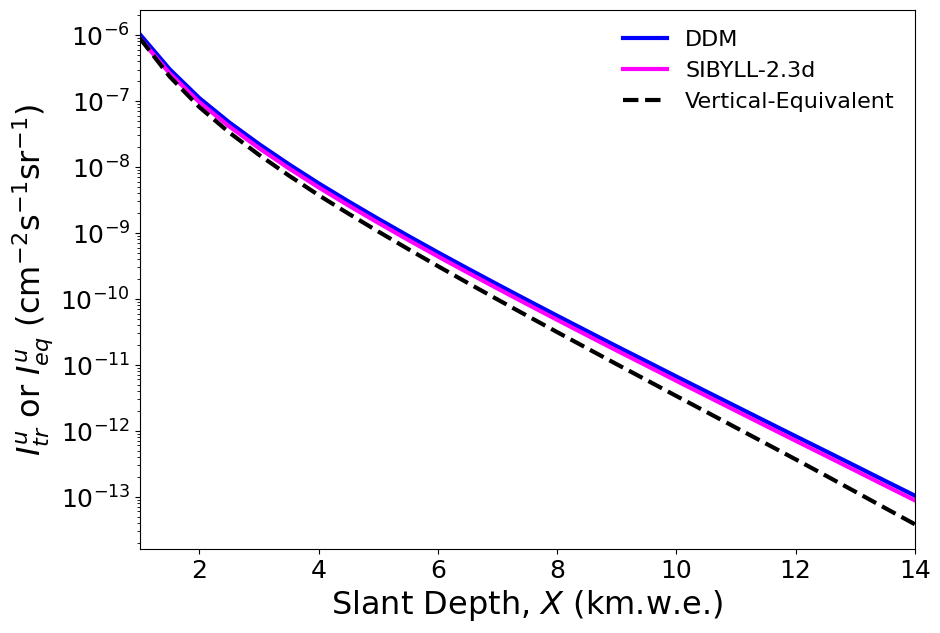

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

ax.plot(mtc.slant_depths, intensities_DDM, color = "blue", lw = 3, ls = "-", label = "DDM")
ax.plot(mtc.slant_depths, intensities_SIB, color = "magenta", lw = 3, ls = "-", label = "SIBYLL-2.3d")
ax.plot(mtc.slant_depths, intensities_EQ, color = "black", lw = 3, ls = "--", label = "Vertical-Equivalent")

ax.set_xlabel("Slant Depth, $X$ (km.w.e.)", fontsize = 23)
ax.set_ylabel(r"$I^u_{tr}$ or $I^u_{eq}$ (cm$^{-2}$s$^{-1}$sr$^{-1}$)", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.set_yscale("log")
ax.set_xlim([1, 14])

plt.legend(frameon = False, fontsize = 16)

plt.show()